<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.integrate import trapz
from scipy.integrate import simpson
from scipy.integrate import quad
from scipy.misc import derivative
from scipy.interpolate import CubicSpline
from scipy.special import ellipk, ellipe


#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación 


\begin{equation*}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation*}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente 
- Emplee un metodo calcular la derivada numérica. 





In [2]:
#Datos 
L = 0.98 #henrios
R = 0.142 #ohms

In [3]:
url="https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/dataset/corrienteVstiempo"
data=pd.read_csv(url)
data=data.drop(data.columns[0], axis='columns')
data.head()

,Corriente,tiempo
0,0.000000,0.00000
1,0.014533,0.10101
2,0.028854,0.20202
3,0.042967,0.30303
4,0.056875,0.40404


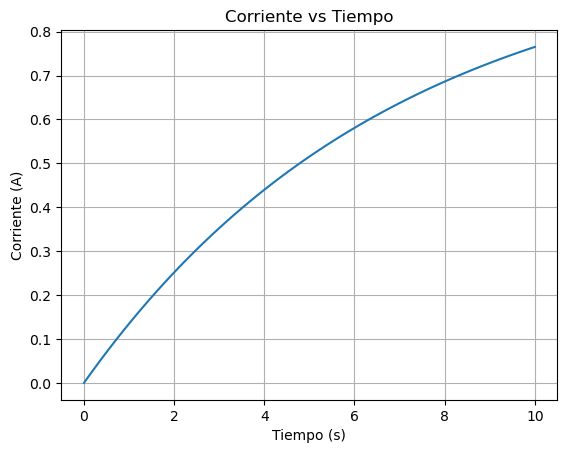

In [4]:
plt.plot(data['tiempo'],data['Corriente'])
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.title('Corriente vs Tiempo')
plt.grid()
plt.show()

/tmp/ipykernel_25356/1444812230.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  didt =derivative(Cs,I,dx=0.01)


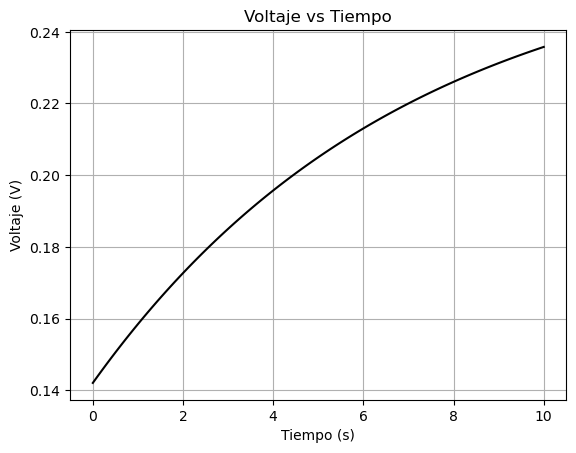

In [5]:
t = data['tiempo']
I = data['Corriente']

#calculando la derivadad numérica
# se interpola con CubicSpline
Cs =CubicSpline(t,I)
# se deriva a traves de misc.derivative
didt =derivative(Cs,I,dx=0.01) 

#Ahora calulamos el voltaje
V = R*I + L*didt

#graficamos el voltaje vs tiempo
plt.plot(t,V,'k')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Voltaje vs Tiempo')
plt.grid()
plt.show()

In [6]:
#En general

#Hecho en clase
def read_file(phat,select):
  if(select=="csv"):
    df= pd.read_csv(phat)
  elif(select=="xlsx"):
    df=pd.read_excel(phat)
  else:
    print("El argumento de read file deberia ser phat y select= cvs o xls")
    df= None
  return  df 

def derivat(df):
    Cs= CubicSpline(df['tiempo'],df['Corriente'])   
    didt = derivative(Cs,df['Corriente'],dx= 0.101) 
    return didt  

def voltaje(df):
    return R*df['Corriente'] + L*derivat(df)
    
  
def plot_volt(df):
    plt.plot(df['tiempo'],voltaje(df),'k')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Voltaje (V)')
    plt.title('Voltaje vs Tiempo')
    plt.grid()
    plt.show()

/tmp/ipykernel_25356/2348063937.py:16: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  didt = derivative(Cs,df['Corriente'],dx= 0.101)


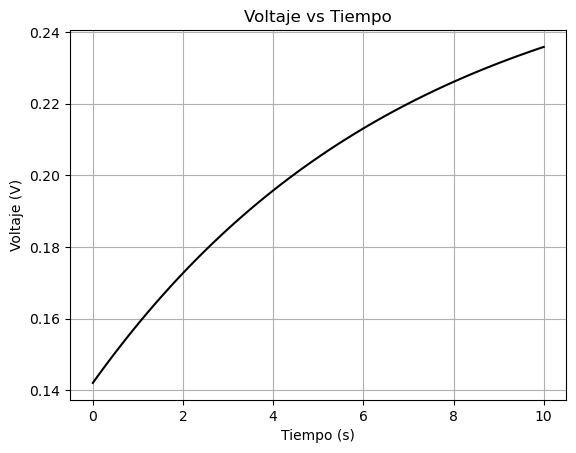

In [7]:
plot_volt(data)

# Parte 2


1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.
2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson
3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.  

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

- $$\int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx $$
- $$ \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx $$
- $$ \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy $$

garantizando  que el error sea menor a $\varepsilon=1E-5$.

----
1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio. 

Dada la función $ f(x)$ y los intevalos $ I= [a, b]$ la integral por la regla del trapecio es :  

\begin{equation*}
\int_a^b f(x) \mathrm{d}x \approx \frac{\Delta x}{2}[f(x_{0})+2f(x_{1})+2f(x_{2})+...+2f(x_{n-1})+ f(x_{n})]
\end{equation*}

Donde $\Delta x$= $\frac{b-a}{n}$ y $n$ representa el numero de sub intervalos en los que se divide $I$.  
  
2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson  
Dada la función $ f(x)$ y los intevalos $I= [a, b]$ la integral por la regla de Simpson dice :  

\begin{equation*}
\int_a^b f(x) \mathrm{d}x \approx \frac{\Delta x}{3}[f(x_{0}) + 2\sum_{j=1}^{n-1}f(x_{2j})+ 4\sum_{j=1}^{n}f(x_{2j-1})+f(x_{n})]
\end{equation*}

Donde $\Delta x$= $\frac{b-a}{n}$ con $n$ par.  

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.
La integración por la el método de cuadratura o método de cuadratura de Gauss esta dada por la expresión:  
  
\begin{equation*}
\int_a^b f(x) \mathrm{d}x \approx \sum_{i=1}^{n}W_{i}f(x_{i})
\end{equation*}

Donde $W_{i}$ son coeficiente arbitrarios y depende de los puntos que se tomen dentro del intervalo y $x_{i} \in [a,b]$

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

- $$\int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx $$
- $$ \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx $$
- $$ \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy $$

garantizando  que el error sea menor a $\varepsilon=1E-5$.

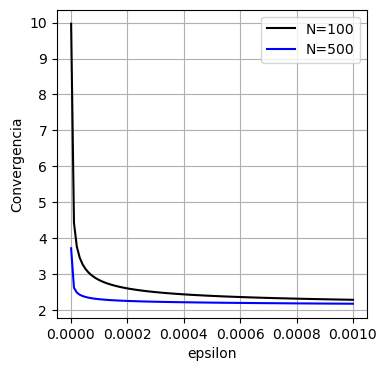

In [8]:
#Trabajo de clase 
f1=lambda x:1/(np.sqrt(np.tan(x)))
# Se realiza una función con el objetivo de observar el comportamiento de la funció
#para diferentes N y epsilon
@np.vectorize
def integral_trap(N, epsilon):
  x = np.linspace(0+epsilon, np.pi/2-epsilon, N)  
  area = trapz(f1(x), x)
  return area

ep=np.linspace(1E-6, 1E-3, 100)
t1=integral_trap(100, ep)
t2=integral_trap(500, ep)
plt.figure(figsize=(4, 4))
plt.plot(ep, t1, label="N=100",color='k')
plt.plot(ep, t2, label="N=500",color='b')
plt.xlabel("epsilon")
plt.ylabel("Convergencia")
plt.legend()
plt.grid()

In [9]:
#creamos una clase de los metodos de integracion (funciona para integrales simples) 

class IntegrationMethods(object):
    """"
    clase para calcular la integral de una funcion f(x) en el intervalo [a,b]
    usando la regla del trapecio, el metodo de Simpson y el metodo de cuadratura compuestos.
    """
    
    def __init__(self, f, a, b, n):
        self.f = f
        self.a = a
        self.b = b
        self.n = n
        self.h = (b-a)/n
        self.x = np.linspace(a, b, n+1)
        self.y = f(self.x)
    
    def trapezoid(self):
        """
        Calcula la integral de una funcion f(x) en el intervalo [a,b] usando la regla del trapecio
        utilizando la funcion de scipy.integrate.trapz
        """
        return trapz(self.y, self.x)
    
    def simpson(self):
        """
        Calcula la integral de una funcion f(x) en el intervalo [a,b] usando el metodo de Simpson
        utilizando la funcion de scipy.integrate.simps
        """
        return simpson(self.y, self.x,dx =1e-5,even='avg')
    
    def quadrature(self):
        """
        Calcula la integral de una funcion f(x) en el intervalo [a,b] usando el metodo de cuadratura compuesto
        utilizando la funcion de scipy.integrate.quad
        """
        return quad(self.f, self.a, self.b,epsabs=1e-5)

sea 
$$f(x) = \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx $$
$$g(x) = \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx $$
$$ h(x) = \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy $$

In [10]:
#Definimos la funcion a integrar

f = lambda x: 1/np.sqrt(np.tan(x)) 
g = lambda x: 1/(1+x**2)


#Para la integral doble, hacemos un par de pasos previos
#Definimos la primer integral
x = sp.Symbol('x')
y = sp.Symbol('y')

h1 = 2*y*sp.sin(x) + sp.cos(x)**2

#Resolvemos la primer integral con scipy.integrate
int1 = sp.integrate(h1, (x, sp.sin(y), sp.cos(y)))

#Ahora lo convertimos en un objeto de numpy y le aplicamos los diferentes metodos de integracion
f = sp.lambdify(y,int1, 'numpy')

# construimos el objeto de la clase
function1 = IntegrationMethods(f, 1e-5, np.pi/2, 10000)
function2 = IntegrationMethods(g, -1e4, 1e4    , 100000)
function3 = IntegrationMethods(f, 0, np.pi/4, 10000)

#Aplicamos los metodos de integracion

print(r'Integral de f(x) en el intervalo [0,\pi/2]:')
print(f"Regla del trapecio: {function1.trapezoid():0.4f}")
print(f"Metodo de Simpson: {function1.simpson():0.4f}")
print(f"Metodo de cuadratura compuesto: {function1.quadrature()[0]:.4f} ")

print()
print(r'Integral de g(x) en el intervalo [-\inf,\inf]:')
print(f"Regla del trapecio: {function2.trapezoid():0.4f}")
print(f"Metodo de Simpson: {function2.simpson():0.4f}")
print(f"Metodo de cuadratura compuesto: {function2.quadrature()[0]:.4f} ")

print("\nIntegral de h(x):")
print(f"Regla del trapecio: {function3.trapezoid():0.4f}")
print(f"Metodo de Simpson: {function3.simpson():0.4f}")
print(f"Metodo de cuadratura compuesto: {function3.quadrature()[0]:.4f} ")

Integral de f(x) en el intervalo [0,\pi/2]:
Regla del trapecio: -0.4596
Metodo de Simpson: -0.4596
Metodo de cuadratura compuesto: -0.4596 

Integral de g(x) en el intervalo [-\inf,\inf]:
Regla del trapecio: 3.1414
Metodo de Simpson: 3.1414
Metodo de cuadratura compuesto: 3.1414 

Integral de h(x):
Regla del trapecio: 0.4041
Metodo de Simpson: 0.4041
Metodo de cuadratura compuesto: 0.4041 


5. The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$

/tmp/ipykernel_25356/3130811199.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return quad(lambda phi: 1/np.sqrt(1-m*np.sin(phi)**2), 0, np.pi/2)[0]
/tmp/ipykernel_25356/3130811199.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda phi: 1/np.sqrt(1-m*np.sin(phi)**2), 0, np.pi/2)[0]
/tmp/ipykernel_25356/3130811199.py:20: RuntimeWarning: divide by zero encountered in log
  return a_0 + a_1*m_1 + a_2*m_1**2 - (b_0 + b_1*m_1 + b_2*m_1**2)*np.log(m_1) + e_m


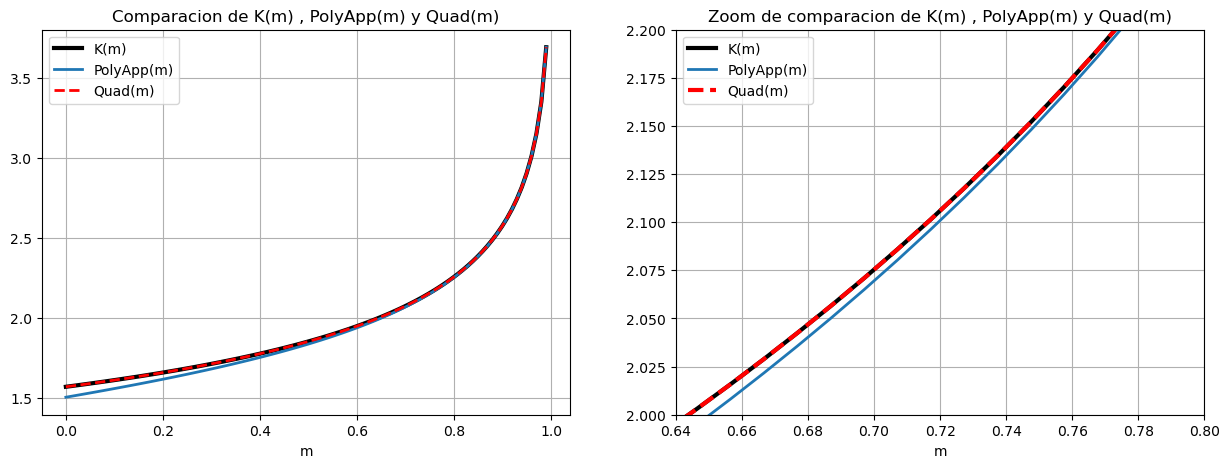

In [11]:
#Solucion de la integral de K(m) con metodo de cuadratura
def Quad(m):
    return quad(lambda phi: 1/np.sqrt(1-m*np.sin(phi)**2), 0, np.pi/2)[0]

#Solucion de la integral de K(m) con la funcion ellipk de scipy
def K(m):
    return ellipk(m)


#Solucion de la integral de K(m) con aproximacion polinomial para una integral eliptica de primer tipo
def PolyApp(m):
    a_0 = 1.3862944
    b_0 = 0.5
    a_1 = 0.1119723
    b_1 = 0.1213478
    a_2 = 0.00725296
    b_2 = 0.0288729
    m_1 = 1-m
    e_m = 3e-5
    return a_0 + a_1*m_1 + a_2*m_1**2 - (b_0 + b_1*m_1 + b_2*m_1**2)*np.log(m_1) + e_m

#Graficamos las tres soluciones
m = np.linspace(0,1,100)
valor_Quad = [Quad(i) for i in m]


fig, axs = plt.subplots(1,2, figsize=(15,5))
ax = axs.flatten()

ax[0].plot(m, K(m), label='K(m)', color='k', linewidth=3)
ax[0].plot(m, PolyApp(m), label='PolyApp(m)', linewidth=2)
ax[0].plot(m,valor_Quad, label='Quad(m)', linestyle='--', color='r', linewidth=2)
ax[0].set_xlabel('m')
ax[0].set_title('Comparacion de K(m) , PolyApp(m) y Quad(m)')
ax[0].grid()
ax[0].legend()


#Hacemos zoom en la parte donde se ve la diferencia entre las soluciones
ax[1].plot(m, K(m), label='K(m)', color='k', linewidth=3)
ax[1].plot(m, PolyApp(m), label='PolyApp(m)', linewidth=2)
ax[1].plot(m,valor_Quad, label='Quad(m)', linestyle='--', color='r', linewidth=3)
ax[1].set_xlabel('m')
ax[1].set_title('Zoom de comparacion de K(m) , PolyApp(m) y Quad(m)')
ax[1].set_xlim(0.64,0.8)
ax[1].set_ylim(2,2.2)
ax[1].grid()
ax[1].legend()

plt.show()

6. Let a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation*}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation*}


where 

\begin{equation*}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation*}


\begin{equation*}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation*}


\begin{equation*}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation*}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r

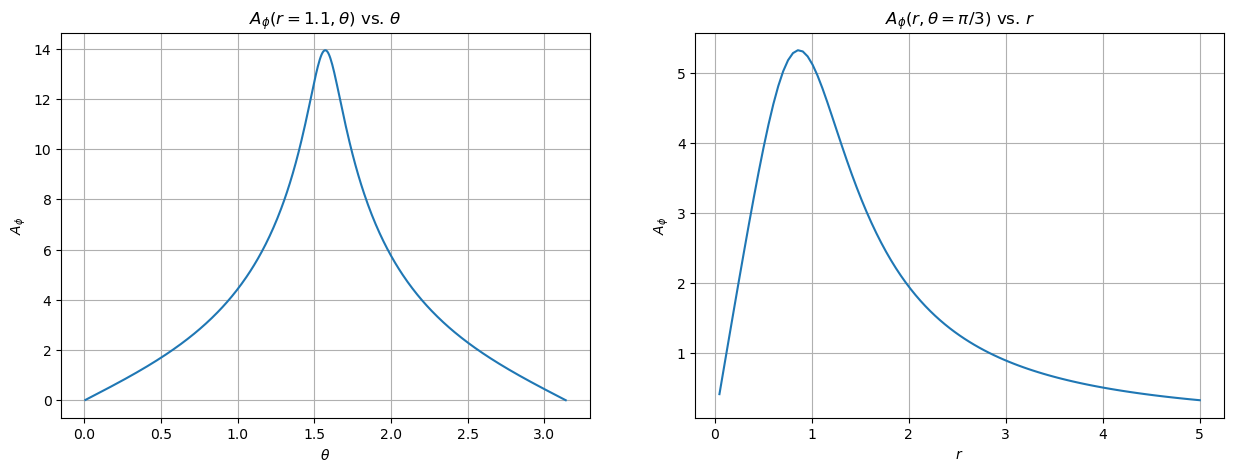

In [12]:
# Ignorar todas las advertencias
warnings.filterwarnings("ignore")


#Utilizamos las funciones ellipk y ellipe de scipy.special para las integrales elipticas
K = lambda k: ellipk(k**2) #Funcion K
E = lambda k: ellipe(k**2) #Funcion E

#K(k) y E(k) como funciones de k con metodo de cuadratura
# def K(k):
#     return integrate.quad(lambda phi: 1/np.sqrt(1-k**2*np.sin(phi)**2), 0, np.pi/2)[0]

# def E(k):
#     return integrate.quad(lambda phi: np.sqrt(1-k**2*np.sin(phi)**2), 0, np.pi/2)[0]


#Contruir la funcion A_phi
def A_phi(r, theta):
    #Datos del problema 
    a = 1
    I = 3
    mu0 = 4*np.pi 
    
    #Definimos a k^2
    k2 = 4*a*r*np.sin(theta)/(a**2+r**2+2*a*r*np.sin(theta))
    k = np.sqrt(k2)
    
    #Separamos la funcion en dos terminos
    term1 = ((mu0/(4*np.pi))*4*I*a)/np.sqrt(a**2+r**2+2*a*r*np.sin(theta))
    term2 = (2-k2)*K(k)-2*E(k)
    
    return term2*term1/k**2

#Ahora se procede a graficar a Aφ(r = 1.1, θ) vs. θ y  Aφ(r, θ = π∕3) vs. r

fig, axs = plt.subplots(1,2, figsize=(15,5))
ax = axs.flatten()

#Grafica de Aφ(r = 1.1, θ) vs. θ
r = 1.1
theta = np.linspace(0,2*np.pi,1000)

ax[0].plot(theta, A_phi(r,theta))
ax[0].set_xlabel(r'$\theta$')
ax[0].set_ylabel(r'$A_{\phi}$')
ax[0].set_title(r'$A_{\phi}(r = 1.1, \theta)$ vs. $\theta$')
ax[0].grid()

#Grafica de Aφ(r, θ = π∕3) vs. r
r = np.linspace(0,5,100)
theta = np.pi/3

ax[1].plot(r, A_phi(r,theta))
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$A_{\phi}$')
ax[1].set_title(r'$A_{\phi}(r, \theta = \pi/3)$ vs. $r$')
ax[1].grid()

plt.show()